# Random Forest Classification on iris under python

#### 1- Import importent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2-Loading the dataset of iris from seaborn liabrary

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3-Making variables to store features(input) and output

In [3]:
# selection of input and output variabls
X = df.iloc[ : , :-1 ]
y = df.iloc[ : , -1: ]

In [4]:
print("---> The data in variale X is ...... \n", X.head())
print("---> The data in variale y is ...... \n", y.head())

---> The data in variale X is ...... 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
---> The data in variale y is ...... 
   species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


#### 4-Creating and fitting the model

In [5]:
# machine learning algorithum
from sklearn.ensemble import RandomForestClassifier

# creat and fit model
model = RandomForestClassifier(n_estimators=100).fit(X,y)
model

C:\Users\C Collection\AppData\Local\Temp\ipykernel_4676\1834305392.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=100).fit(X,y)


RandomForestClassifier()

#### 5-Prediction of unknown values (Testing the model)

In [6]:
# prediction
model.predict([[4.6,3.1,1.5,0.2]])

c:\Users\C Collection\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

### 6-Check the accuracy o the model

#### Step1- Training the model

In [7]:
# spliting data into 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=True)

#### Step-2 : Creating and itting the model model and getting the prediction values of training data

In [8]:
# creating and fiting model
model = RandomForestClassifier().fit(X_train, y_train)

predict_values = model.predict(X_test)
predict_values

C:\Users\C Collection\AppData\Local\Temp\ipykernel_4676\3040370150.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(X_train, y_train)


array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

#### Step-3 check the accuracy score of the model

1-Accuracy score by sklearn library

In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predict_values)
score

1.0

2-Accuracy score by score function

In [10]:
model.score(X_test,y_test)

1.0

#### Step-4 : Draw a confusion matric

In [11]:
# confussion matrics
from sklearn import metrics
predicts = model.predict(X_test)
cm = metrics.confusion_matrix(y_test,predict_values) 
cm

array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 4]], dtype=int64)

#### Step-5 : For better visualization of confusion matric , here is heat map

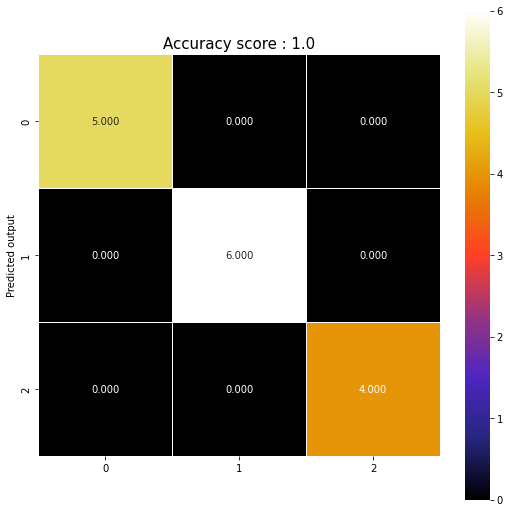

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True,cmap="CMRmap");
plt.ylabel("Actual output")
plt.ylabel("Predicted output")
all_sample_title= "Accuracy score : {0}".format(score)
plt.title(all_sample_title, size=15);